# Static Huffman coding

## Huffman Encoding Process

### Step 1: Count Frequencies

Count how often each character appears in your input text

Create a table mapping each character to its frequency

### Step 2: Create Initial Nodes

Make a leaf node for each character

Sort nodes by frequency (lowest to highest)

### Step 3: Build the Tree

Take the two lowest frequency nodes

Combine them into a new node (sum of their frequencies)

Repeat until only one node remains (the root)

### Step 4: Assign Codes

Start from the root and assign:

'0' for left branches

'1' for right branches

Each path from root to leaf gives a character's code

### Step 5: Encode Message

Replace each character with its code

Join all codes together to get the compressed bitstream

STATIC HUFFMAN CODING DEMONSTRATION
Input text: AAAABBCD

Step 1: Character Frequency Analysis
  Character 'A': 4 occurrences
  Character 'B': 2 occurrences
  Character 'C': 1 occurrences
  Character 'D': 1 occurrences

Step 2: Huffman Tree Construction
  Characters sorted by frequency (highest to lowest):
  'A': 4
  'B': 2
  'C': 1
  'D': 1

Step 3: Huffman Codes Generated
  Character 'A': 0
  Character 'B': 10
  Character 'C': 110
  Character 'D': 111

Step 4: Encoding the Text
  Original text: AAAABBCD
  Encoded bitstream: 00001010110111

Huffman Encoding Table:
Character  Frequency Huffman Code
        A          4            0
        B          2           10
        C          1          110
        D          1          111


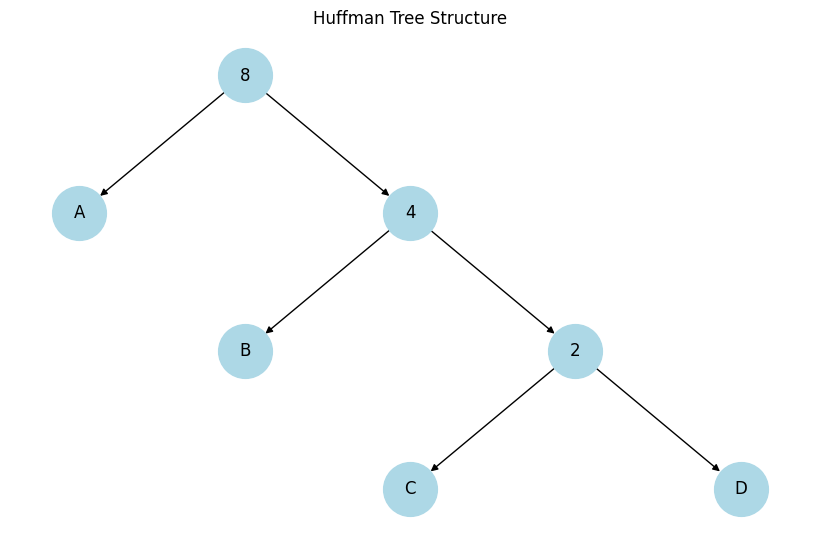

In [11]:
import heapq
from collections import Counter
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

# Define the HuffmanNode class for the tree structure
class HuffmanNode:
    def __init__(self, char, freq):
        self.char = char
        self.freq = freq
        self.left = None
        self.right = None

    def __lt__(self, other):
        return self.freq < other.freq

# Build the Huffman tree and track steps for visualization
def build_huffman_tree(text):
    frequency = Counter(text)
    
    # Step 1: Character Frequency Analysis
    print("Step 1: Character Frequency Analysis")
    for char, count in sorted(frequency.items(), key=lambda x: x[1], reverse=True):
        print(f"  Character '{char}': {count} occurrences")
    
    # Create the heap with nodes
    heap = [HuffmanNode(char, freq) for char, freq in frequency.items()]
    heapq.heapify(heap)

    # Step 2: Huffman Tree Construction
    print("\nStep 2: Huffman Tree Construction")
    print("  Characters sorted by frequency (highest to lowest):")
    for char, count in sorted(frequency.items(), key=lambda x: x[1], reverse=True):
        print(f"  '{char}': {count}")
    
    while len(heap) > 1:
        left = heapq.heappop(heap)
        right = heapq.heappop(heap)
        
        # Merge two nodes
        merged = HuffmanNode(None, left.freq + right.freq)
        merged.left = left
        merged.right = right
        
        heapq.heappush(heap, merged)

    return heap[0], frequency

# Generate Huffman codes from the tree
def generate_huffman_codes(node, prefix="", codebook={}):
    if node:
        if node.char is not None:
            codebook[node.char] = prefix
        generate_huffman_codes(node.left, prefix + "0", codebook)
        generate_huffman_codes(node.right, prefix + "1", codebook)
    return codebook

# Encode the text using the Huffman codes
def huffman_encode(text, codebook):
    return "".join(codebook[char] for char in text)

# Visualize the Huffman tree using NetworkX and Matplotlib
def visualize_huffman_tree(root):
    G = nx.DiGraph()
    pos = {}
    labels = {}

    def traverse(node, parent=None, depth=0, x=0):
        if node:
            node_id = id(node)
            pos[node_id] = (x, -depth)
            labels[node_id] = node.char if node.char else node.freq
            if parent is not None:
                G.add_edge(parent, node_id)
            traverse(node.left, node_id, depth + 1, x - 1)
            traverse(node.right, node_id, depth + 1, x + 1)

    traverse(root)
    plt.figure(figsize=(8, 5))
    nx.draw(G, pos, labels=labels, with_labels=True, node_size=1500, node_color='lightblue')
    plt.title("Huffman Tree Structure")
    plt.show()

# Generate the frequency and Huffman code table
def generate_table(frequencies, codes):
    df = pd.DataFrame(list(frequencies.items()), columns=["Character", "Frequency"])
    df["Huffman Code"] = df["Character"].map(codes)
    print("\nHuffman Encoding Table:")
    print(df.to_string(index=False))

# Example usage
input_text = "AAAABBCD"
print("STATIC HUFFMAN CODING DEMONSTRATION")
print("===================================")
print(f"Input text: {input_text}\n")

# Build the Huffman tree
huffman_tree, frequencies = build_huffman_tree(input_text)

# Generate Huffman codes from the tree
huffman_codes = generate_huffman_codes(huffman_tree)

# Step 3: Huffman Codes Generated
print("\nStep 3: Huffman Codes Generated")
for char, code in sorted(huffman_codes.items(), key=lambda x: len(x[1])):
    print(f"  Character '{char}': {code}")

# Encode the text
encoded_text = huffman_encode(input_text, huffman_codes)

# Step 4: Encoding the Text
print("\nStep 4: Encoding the Text")
print(f"  Original text: {input_text}")
print(f"  Encoded bitstream: {encoded_text}")

# Output Huffman Codes and Encoded Output
generate_table(frequencies, huffman_codes)

# Visualize the Huffman tree
visualize_huffman_tree(huffman_tree)


## Huffman Decoding Process

### Step 1: Prepare for Decoding

Have the encoded bitstream and Huffman tree ready

### Step 2: Start at Root

Begin at the root of the Huffman tree

Initialize empty output string

### Step 3: Navigate the Tree

Read each bit from the encoded data

Move left for '0', right for '1'

### Step 4: Find Characters

When you reach a leaf node, output its character

Go back to the root and continue with next bit

### Step 5: Complete Decoding

Continue until all bits are processed

The result is your original message



In [18]:
import pandas as pd

# Decode the text using the Huffman tree with step-by-step output in a structured DataFrame table format
def huffman_decode(encoded_text, root):
    decoded_text = ""
    node = root
    print("\nStep 5: Decoding Process")
    
    # Initialize a list to store each decoding step for DataFrame display
    decoding_steps = []
    
    for i, bit in enumerate(encoded_text):
        # Traverse the Huffman tree based on the bit value
        if bit == "0":
            node = node.left
        else:
            node = node.right
        
        # Collect step information
        action = f"Traversing to {'left' if bit == '0' else 'right'}"
        
        # Check if the node is a leaf node (character node)
        if node.char is not None:
            decoded_text += node.char
            action += f" -> Found leaf node: '{node.char}' -> Adding to decoded text"
        
        # Add current step to decoding_steps list
        decoding_steps.append((i + 1, bit, action, node.char if node.char else "", decoded_text))
        
        # Reset node to root if a leaf node was found
        if node.char is not None:
            node = root
    
    # Convert the decoding_steps list to a pandas DataFrame for better display
    df = pd.DataFrame(decoding_steps, columns=["Bit Number", "Bit Value", "Action", "Current Node", "Decoded Text So Far"])
    
    # Display the DataFrame (this will automatically format it as a table)
    print("\nDecoding steps:")
    print(df.to_string(index=False))
    
    return decoded_text

# Example usage for decoding
encoded_text = "000010110110111"  # Example encoded text from earlier steps
decoded_text = huffman_decode(encoded_text, huffman_tree)

# Output the final decoded text
print("\nDecoded Text:", decoded_text)



Step 5: Decoding Process

Decoding steps:
 Bit Number Bit Value                                                                Action Current Node Decoded Text So Far
          1         0  Traversing to left -> Found leaf node: 'A' -> Adding to decoded text            A                   A
          2         0  Traversing to left -> Found leaf node: 'A' -> Adding to decoded text            A                  AA
          3         0  Traversing to left -> Found leaf node: 'A' -> Adding to decoded text            A                 AAA
          4         0  Traversing to left -> Found leaf node: 'A' -> Adding to decoded text            A                AAAA
          5         1                                                   Traversing to right                             AAAA
          6         0  Traversing to left -> Found leaf node: 'B' -> Adding to decoded text            B               AAAAB
          7         1                                                   Traversing

# Dynamic/ Adaptive Huffman Coding

### ENCODER

Initial_code (); 

While not EOF

{   

    Get(c);     

    Encode(c);        
    
    Update_tree(c);   

}

=== ENCODING PHASE ===
ADAPTIVE HUFFMAN CODING ENCODER
Input text: AADCCDD

Step 1: Adaptive Encoding Process

Encoding steps:
 Step Character  New Character? Code Added                   Encoded Text So Far
    1         A            True   01000001                              01000001
    2         A           False          1                             010000011
    3         D            True  001000100                    010000011001000100
    4         C            True 0001000011          0100000110010001000001000011
    5         C           False        001       0100000110010001000001000011001
    6         D           False        101    0100000110010001000001000011001101
    7         D           False        101 0100000110010001000001000011001101101

Final encoded bitstream: 0100000110010001000001000011001101101
Original size (bits): 56
Compressed size (bits): 37
Compression ratio: 1.51


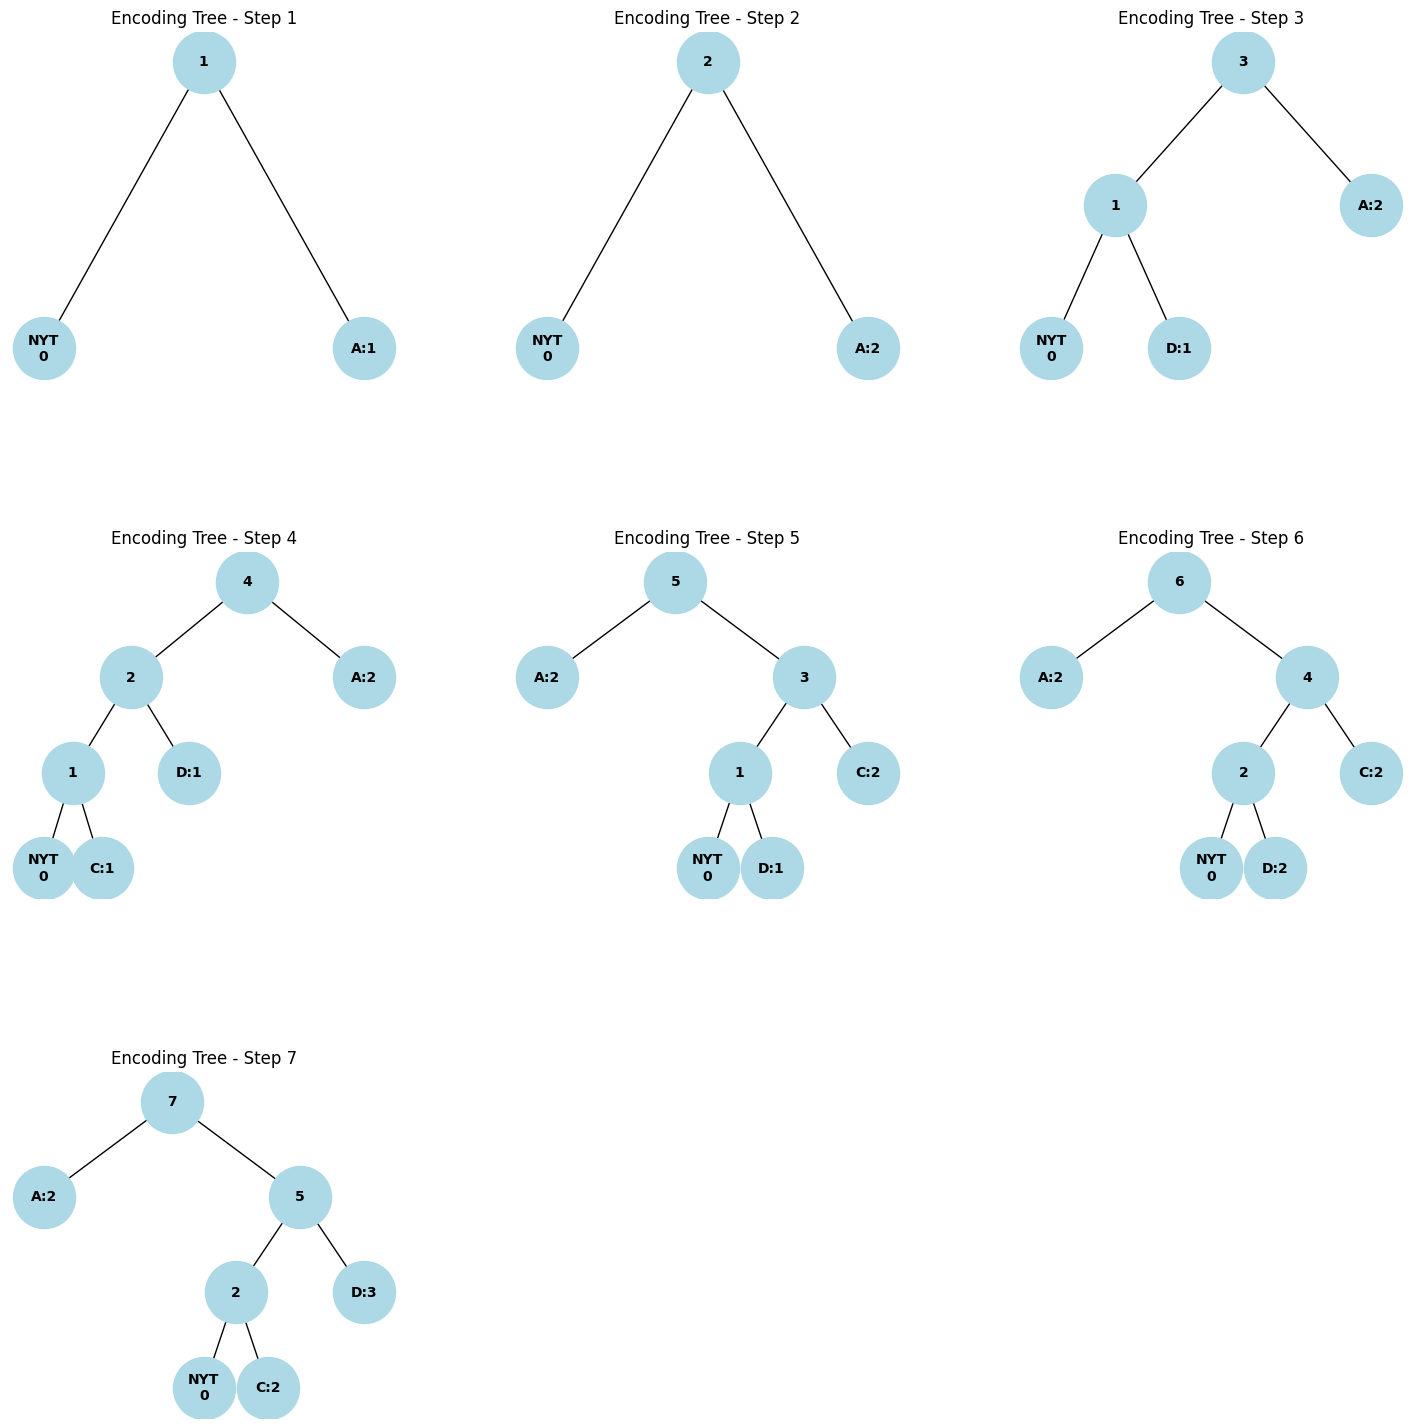

Encoded output: 0100000110010001000001000011001101101


In [47]:
# Imports for visualization and output
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Original Node class (unchanged)
class Node:
    def __init__(self, symbol=None, weight=0, number=0):
        self.symbol = symbol
        self.weight = weight
        self.number = number
        self.parent = None
        self.left = None
        self.right = None

# Original AdaptiveHuffmanTree class (unchanged, only encoding-related methods)
class AdaptiveHuffmanTree:
    def __init__(self, alphabet_size=256):
        # Create NYT (Not Yet Transmitted) node
        self.NYT = Node(symbol=None, weight=0, number=alphabet_size * 2)
        self.root = self.NYT
        
        # Dictionary to keep track of symbols in the tree
        self.symbol_nodes = {}
        
        # Next available node number
        self.next_number = alphabet_size * 2 - 1
        
        # Alphabet size
        self.alphabet_size = alphabet_size
        
        # All nodes list to maintain order
        self.all_nodes = [self.NYT]
    
    def find_node_with_highest_number(self, weight):
        """Find the node with highest number for a given weight"""
        highest_node = None
        
        for node in self.all_nodes:
            if node.weight == weight:
                if highest_node is None or node.number > highest_node.number:
                    highest_node = node
        
        return highest_node
    
    def swap_nodes(self, node1, node2):
        """Swap two nodes in the tree"""
        if not node1 or not node2 or node1 == node2:
            return
            
        parent1, parent2 = node1.parent, node2.parent
        
        if parent1 == node2 or parent2 == node1:
            return
            
        is_node1_left = parent1 and parent1.left == node1
        is_node2_left = parent2 and parent2.left == node2
            
        if parent1:
            if is_node1_left:
                parent1.left = node2
            else:
                parent1.right = node2
                
        if parent2:
            if is_node2_left:
                parent2.left = node1
            else:
                parent2.right = node1
                
        node1.parent, node2.parent = parent2, parent1
        
        if self.root == node1:
            self.root = node2
        elif self.root == node2:
            self.root = node1
            
        node1.number, node2.number = node2.number, node1.number
        
        idx1 = self.all_nodes.index(node1)
        idx2 = self.all_nodes.index(node2)
        self.all_nodes[idx1], self.all_nodes[idx2] = self.all_nodes[idx2], self.all_nodes[idx1]
    
    def update_tree(self, symbol):
        """Update the tree after processing a symbol"""
        if symbol in self.symbol_nodes:
            node = self.symbol_nodes[symbol]
        else:
            self.next_number -= 1
            new_leaf = Node(symbol=symbol, weight=0, number=self.next_number)
            
            self.next_number -= 1
            internal = Node(symbol=None, weight=0, number=self.next_number)
            
            internal.parent = self.NYT.parent
            internal.left = self.NYT
            internal.right = new_leaf
            
            self.NYT.parent = internal
            new_leaf.parent = internal
            
            if internal.parent:
                if internal.parent.left == self.NYT:
                    internal.parent.left = internal
                else:
                    internal.parent.right = internal
            else:
                self.root = internal
            
            self.all_nodes.append(internal)
            self.all_nodes.append(new_leaf)
            self.symbol_nodes[symbol] = new_leaf
            
            node = new_leaf
        
        self.increment_weight(node)
    
    def increment_weight(self, node):
        """Increment the weight of a node and maintain the sibling property"""
        while node:
            highest = self.find_node_with_highest_number(node.weight)
            
            if highest and highest != node and highest != node.parent and node != self.NYT:
                if highest != self.NYT and highest.parent != self.NYT and highest != self.root:
                    self.swap_nodes(highest, node)
            
            node.weight += 1
            node = node.parent
    
    def get_code(self, symbol):
        """Get the code for a symbol"""
        if symbol not in self.symbol_nodes:
            code = self.get_path(self.NYT) + format(symbol, f'0{8}b')
            return code
        else:
            return self.get_path(self.symbol_nodes[symbol])
    
    def get_path(self, node):
        """Get the path from root to a node (the code)"""
        if node == self.root:
            return ""
            
        path = ""
        current = node
        
        while current != self.root:
            parent = current.parent
            if not parent:
                break
                
            if parent.left == current:
                path = "0" + path
            else:
                path = "1" + path
            current = parent
        
        return path
    
    def encode(self, data):
        """Encode a sequence of symbols"""
        encoded = ""
        
        for symbol in data:
            encoded += self.get_code(symbol)
            self.update_tree(symbol)
        
        return encoded

# Function to visualize the tree
def visualize_huffman_tree(tree, step, ax):
    """Visualize the current state of the Huffman tree"""
    G = nx.DiGraph()
    pos = {}
    labels = {}

    def traverse(node, parent_id=None, depth=0, x=0):
        if node:
            node_id = id(node)
            pos[node_id] = (x, -depth)
            if node == tree.NYT:
                labels[node_id] = f"NYT\n{node.weight}"
            elif node.symbol is None:
                labels[node_id] = f"{node.weight}"
            else:
                labels[node_id] = f"{chr(node.symbol)}:{node.weight}"
            
            if parent_id is not None:
                G.add_edge(parent_id, node_id)
            
            left_x = x - 2**(max(3-depth, 0))
            right_x = x + 2**(max(3-depth, 0))
            
            if node.left:
                traverse(node.left, node_id, depth + 1, left_x)
            if node.right:
                traverse(node.right, node_id, depth + 1, right_x)

    traverse(tree.root)
    nx.draw(G, pos, labels=labels, with_labels=True, node_size=2000, node_color='lightblue', 
            font_size=10, font_weight='bold', arrows=False, ax=ax)
    ax.set_title(f"Encoding Tree - Step {step}")
    ax.axis('off')

# Encoder with visualization
def encode_with_visualization(input_data):
    """Encode a string or bytes with visualization and detailed output"""
    adaptive_huffman = AdaptiveHuffmanTree()
    
    # Convert string to ASCII values if input is a string
    if isinstance(input_data, str):
        data = [ord(c) for c in input_data]
    else:
        data = list(input_data)
    
    print("ADAPTIVE HUFFMAN CODING ENCODER")
    print("===============================")
    print(f"Input text: {input_data}\n")
    
    print("Step 1: Adaptive Encoding Process")
    encoding_steps = []
    
    # Set up subplots for visualization (3 plots per row)
    total_steps = len(data)
    rows_needed = (total_steps + 2) // 3  # Ceiling division
    fig, axs = plt.subplots(rows_needed, 3, figsize=(18, 6 * rows_needed))
    plt.subplots_adjust(wspace=0.3, hspace=0.5)
    
    # Flatten axs for easier indexing if multiple rows
    if rows_needed > 1:
        axs = axs.flatten()
    else:
        axs = [axs] if total_steps == 1 else axs
    
    encoded = ""
    for i, symbol in enumerate(data):
        # Get code for current symbol
        code = adaptive_huffman.get_code(symbol)
        encoded += code
        
        # Record the step
        is_new = symbol not in adaptive_huffman.symbol_nodes
        encoding_steps.append((i + 1, chr(symbol), is_new, code, encoded))
        
        # Update the tree
        adaptive_huffman.update_tree(symbol)
        
        # Visualize the current state of the tree
        visualize_huffman_tree(adaptive_huffman, i + 1, axs[i])
    
    # Remove empty subplots
    for i in range(len(data), len(axs)):
        fig.delaxes(axs[i])
    
    # Display encoding steps in a DataFrame
    df = pd.DataFrame(encoding_steps, 
                     columns=["Step", "Character", "New Character?", "Code Added", "Encoded Text So Far"])
    print("\nEncoding steps:")
    print(df.to_string(index=False))
    
    print(f"\nFinal encoded bitstream: {encoded}")
    print(f"Original size (bits): {len(input_data) * 8}")
    print(f"Compressed size (bits): {len(encoded)}")
    if len(encoded) > 0:
        print(f"Compression ratio: {(len(input_data) * 8) / len(encoded):.2f}")
    
    # Show plots
    plt.show()
    
    return encoded

# Test the encoder
if __name__ == "__main__":
    test_string = "AADCCDD"
    print("=== ENCODING PHASE ===")
    encoded = encode_with_visualization(test_string)
    print(f"Encoded output: {encoded}")

### DECODER

initial_code(); 

while not EOF               

{    
    
    decode(c);    
    
    output(c);    
    
    update_tree(c);

} 

In [53]:
# Imports for visualization and output
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Original Node class (unchanged)
class Node:
    def __init__(self, symbol=None, weight=0, number=0):
        self.symbol = symbol
        self.weight = weight
        self.number = number
        self.parent = None
        self.left = None
        self.right = None

# Original AdaptiveHuffmanTree class (unchanged)
class AdaptiveHuffmanTree:
    def __init__(self, alphabet_size=256):
        # Create NYT (Not Yet Transmitted) node
        self.NYT = Node(symbol=None, weight=0, number=alphabet_size * 2)
        self.root = self.NYT
        
        # Dictionary to keep track of symbols in the tree
        self.symbol_nodes = {}
        
        # Next available node number
        self.next_number = alphabet_size * 2 - 1
        
        # Alphabet size
        self.alphabet_size = alphabet_size
        
        # All nodes list to maintain order
        self.all_nodes = [self.NYT]
    
    def find_node_with_highest_number(self, weight):
        """Find the node with highest number for a given weight"""
        highest_node = None
        
        for node in self.all_nodes:
            if node.weight == weight:
                if highest_node is None or node.number > highest_node.number:
                    highest_node = node
        
        return highest_node
    
    def swap_nodes(self, node1, node2):
        """Swap two nodes in the tree"""
        if not node1 or not node2 or node1 == node2:
            return
            
        parent1, parent2 = node1.parent, node2.parent
        
        if parent1 == node2 or parent2 == node1:
            return
            
        is_node1_left = parent1 and parent1.left == node1
        is_node2_left = parent2 and parent2.left == node2
            
        if parent1:
            if is_node1_left:
                parent1.left = node2
            else:
                parent1.right = node2
                
        if parent2:
            if is_node2_left:
                parent2.left = node1
            else:
                parent2.right = node1
                
        node1.parent, node2.parent = parent2, parent1
        
        if self.root == node1:
            self.root = node2
        elif self.root == node2:
            self.root = node1
            
        node1.number, node2.number = node2.number, node1.number
        
        idx1 = self.all_nodes.index(node1)
        idx2 = self.all_nodes.index(node2)
        self.all_nodes[idx1], self.all_nodes[idx2] = self.all_nodes[idx2], self.all_nodes[idx1]
    
    def update_tree(self, symbol):
        """Update the tree after processing a symbol"""
        if symbol in self.symbol_nodes:
            node = self.symbol_nodes[symbol]
        else:
            self.next_number -= 1
            new_leaf = Node(symbol=symbol, weight=0, number=self.next_number)
            
            self.next_number -= 1
            internal = Node(symbol=None, weight=0, number=self.next_number)
            
            internal.parent = self.NYT.parent
            internal.left = self.NYT
            internal.right = new_leaf
            
            self.NYT.parent = internal
            new_leaf.parent = internal
            
            if internal.parent:
                if internal.parent.left == self.NYT:
                    internal.parent.left = internal
                else:
                    internal.parent.right = internal
            else:
                self.root = internal
            
            self.all_nodes.append(internal)
            self.all_nodes.append(new_leaf)
            self.symbol_nodes[symbol] = new_leaf
            
            node = new_leaf
        
        self.increment_weight(node)
    
    def increment_weight(self, node):
        """Increment the weight of a node and maintain the sibling property"""
        while node:
            highest = self.find_node_with_highest_number(node.weight)
            
            if highest and highest != node and highest != node.parent and node != self.NYT:
                if highest != self.NYT and highest.parent != self.NYT and highest != self.root:
                    self.swap_nodes(highest, node)
            
            node.weight += 1
            node = node.parent
    
    def decode_next_symbol(self, bitstream, position):
        """Decode the next symbol from a bitstream starting at position"""
        if position >= len(bitstream):
            return None, position
            
        current = self.root
        
        while current:
            if current.symbol is not None:
                return current.symbol, position
                
            if current == self.NYT:
                if position + 8 <= len(bitstream):
                    symbol_bits = bitstream[position:position+8]
                    position += 8
                    try:
                        symbol = int(symbol_bits, 2)
                        return symbol, position
                    except ValueError:
                        return None, len(bitstream)
                else:
                    return None, len(bitstream)
            
            if position < len(bitstream):
                bit = bitstream[position]
                position += 1
                
                if bit == '0':
                    current = current.left
                elif bit == '1':
                    current = current.right
                else:
                    return None, position
            else:
                return None, position
        
        return None, position
    
    def decode(self, bitstream):
        """Decode a bitstream"""
        decoded = []
        position = 0
        
        while position < len(bitstream):
            symbol, new_position = self.decode_next_symbol(bitstream, position)
            
            if symbol is None or new_position == position:
                break
                
            position = new_position
            decoded.append(symbol)
            self.update_tree(symbol)
        
        return decoded

# Function to visualize the tree
def visualize_huffman_tree(tree, step, ax):
    """Visualize the current state of the Huffman tree"""
    G = nx.DiGraph()
    pos = {}
    labels = {}

    def traverse(node, parent_id=None, depth=0, x=0):
        if node:
            node_id = id(node)
            pos[node_id] = (x, -depth)
            if node == tree.NYT:
                labels[node_id] = f"NYT\n{node.weight}"
            elif node.symbol is None:
                labels[node_id] = f"{node.weight}"
            else:
                labels[node_id] = f"{chr(node.symbol)}:{node.weight}"
            
            if parent_id is not None:
                G.add_edge(parent_id, node_id)
            
            left_x = x - 2**(max(3-depth, 0))
            right_x = x + 2**(max(3-depth, 0))
            
            if node.left:
                traverse(node.left, node_id, depth + 1, left_x)
            if node.right:
                traverse(node.right, node_id, depth + 1, right_x)

    traverse(tree.root)
    nx.draw(G, pos, labels=labels, with_labels=True, node_size=2000, node_color='lightblue', 
            font_size=10, font_weight='bold', arrows=False, ax=ax)
    ax.set_title(f"Decoding Tree - Step {step}")
    ax.axis('off')

# Updated decoder with detailed logging
def decode_with_visualization(encoded_data):
    """Decode a bitstream with visualization and detailed output"""
    # Validate bitstream
    if not encoded_data or not all(c in '01' for c in encoded_data):
        print(f"Error: Invalid bitstream '{encoded_data}'")
        return ""
    
    adaptive_huffman = AdaptiveHuffmanTree()
    
    print("ADAPTIVE HUFFMAN CODING DECODER")
    print("===============================")
    print(f"Input bitstream: {encoded_data}")
    print(f"Bitstream length: {len(encoded_data)} bits\n")
    
    print("Step 1: Adaptive Decoding Process")
    decoding_steps = []
    
    decoded = []
    position = 0
    step = 0
    
    # Set up subplots
    estimated_steps = max(1, len(encoded_data) // 4)
    rows_needed = (estimated_steps + 2) // 3
    fig, axs = plt.subplots(max(1, rows_needed), 3, figsize=(18, 6 * max(1, rows_needed)))
    plt.subplots_adjust(wspace=0.3, hspace=0.5)
    
    if rows_needed > 1:
        axs = axs.flatten()
    else:
        axs = [axs] if estimated_steps == 1 else axs
    
    ax_index = 0
    while position < len(encoded_data):
        start_position = position
        symbol, new_position = adaptive_huffman.decode_next_symbol(encoded_data, position)
        
        if symbol is None:
            print(f"Warning: Decoding failed at position {position}. Stopping.")
            break
            
        if new_position == position:
            print(f"Warning: No progress made at position {position}. Stopping.")
            break
            
        step += 1
        bits_used = encoded_data[start_position:new_position]
        position = new_position
        decoded.append(symbol)
        
        # Check if symbol is new before updating tree
        is_new = symbol not in adaptive_huffman.symbol_nodes
        # Log tree state
        print(f"\nStep {step}: Decoded symbol '{chr(symbol)}' (ASCII {symbol}), Bits used: {bits_used}, New: {is_new}")
        print(f"Position: {start_position} -> {new_position}, Remaining bits: {encoded_data[position:]}")
        
        # Update the tree
        adaptive_huffman.update_tree(symbol)
        
        # Record the step
        decoding_steps.append((step, chr(symbol), is_new, bits_used, ''.join(chr(c) for c in decoded)))
        
        # Visualize the tree
        if ax_index < len(axs):
            visualize_huffman_tree(adaptive_huffman, step, axs[ax_index])
            ax_index += 1
    
    # Remove unused subplots
    for i in range(ax_index, len(axs)):
        fig.delaxes(axs[i])
    
    # Display decoding steps
    df = pd.DataFrame(decoding_steps, 
                     columns=["Step", "Character", "New Character?", "Bits Used", "Decoded Text So Far"])
    print("\nDecoding steps:")
    print(df.to_string(index=False))
    
    decoded_text = ''.join(chr(c) for c in decoded)
    print(f"\nFinal decoded text: {decoded_text}")
    print(f"Input bitstream length (bits): {len(encoded_data)}")
    print(f"Decoded characters: {len(decoded)}")
    print(f"Bits consumed: {position}")
    if position < len(encoded_data):
        print(f"Warning: {len(encoded_data) - position} bits remaining: {encoded_data[position:]}")
    
    # Show plots
    plt.show()
    
    return decoded_text

=== DECODING PHASE ===
ADAPTIVE HUFFMAN CODING DECODER
Input bitstream: 0100000110010001000001000011001101101
Bitstream length: 37 bits

Step 1: Adaptive Decoding Process

Step 1: Decoded symbol 'A' (ASCII 65), Bits used: 01000001, New: True
Position: 0 -> 8, Remaining bits: 10010001000001000011001101101

Step 2: Decoded symbol 'A' (ASCII 65), Bits used: 1, New: False
Position: 8 -> 9, Remaining bits: 0010001000001000011001101101

Step 3: Decoded symbol 'D' (ASCII 68), Bits used: 001000100, New: True
Position: 9 -> 18, Remaining bits: 0001000011001101101

Step 4: Decoded symbol 'C' (ASCII 67), Bits used: 0001000011, New: True
Position: 18 -> 28, Remaining bits: 001101101

Step 5: Decoded symbol 'C' (ASCII 67), Bits used: 001, New: False
Position: 28 -> 31, Remaining bits: 101101

Step 6: Decoded symbol 'D' (ASCII 68), Bits used: 101, New: False
Position: 31 -> 34, Remaining bits: 101

Step 7: Decoded symbol 'D' (ASCII 68), Bits used: 101, New: False
Position: 34 -> 37, Remaining bits: 

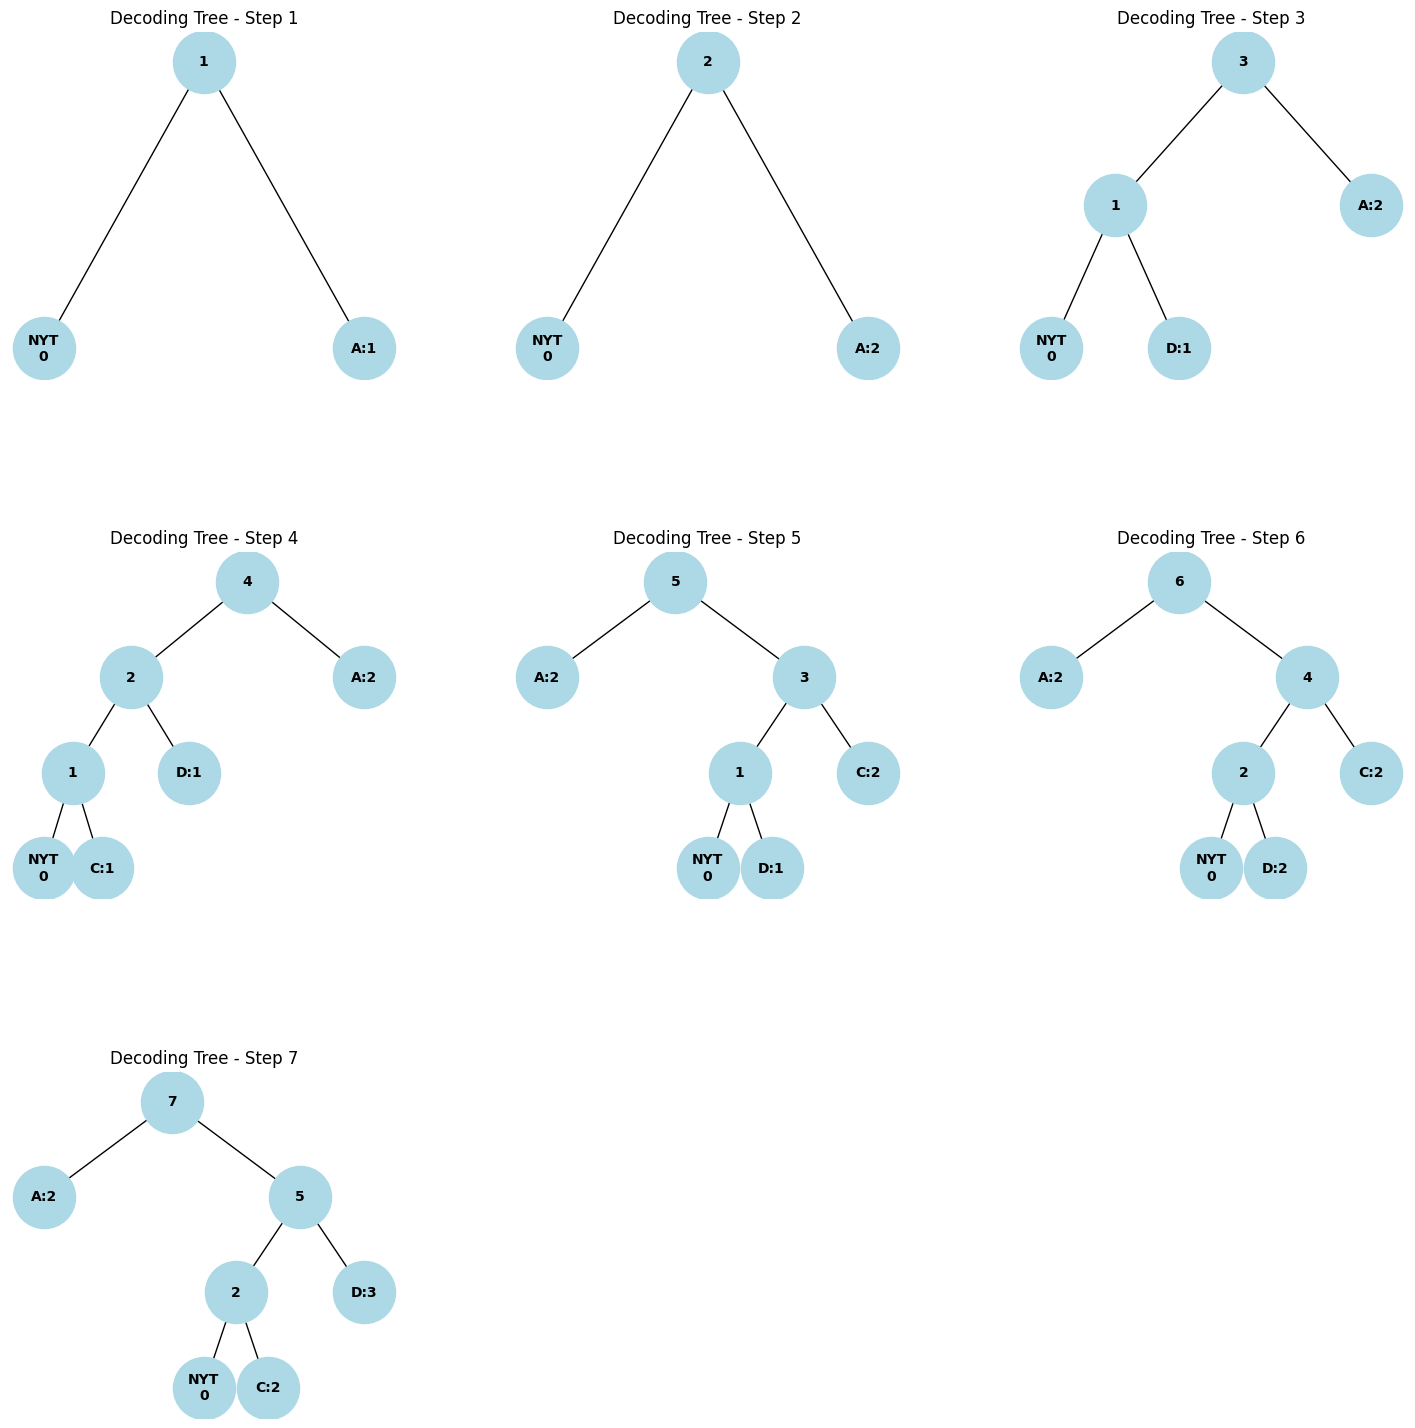

Decoded output: AADCCDD


In [ ]:
if __name__ == "__main__":
    # Option 1: Use the correct encoded bitstream produced by the encoder.
    sample_encoded = "0100000110010001000001000011001101101"
    print("=== DECODING PHASE ===")
    decoded = decode_with_visualization(sample_encoded)
    print(f"Decoded output: {decoded}")


# Arithmetic Coding

### Encoder part

BEGIN: 

Low = 0.0; 

high 1.0; 

While (Symbol != terminator) 

{ 

get (Symbol); 

range = 1.0; 

Low = low + range x range_low (Symbol); 

High = low + range x range_high (Symbol); 

range = high – low; 

} 

Output a code so that low ≤ Code < high; 

END

In [71]:
import pandas as pd

# Define the symbol probabilities and ranges
symbol_probs = {
    'e': 0.3,  # [0.0, 0.3)
    'n': 0.3,  # [0.3, 0.6)
    't': 0.2,  # [0.6, 0.8)
    'w': 0.1,  # [0.8, 0.9)
    '.': 0.1   # [0.9, 1.0)
}

# Calculate cumulative ranges for each symbol
cumulative_ranges = {}
low = 0.0
for symbol, prob in symbol_probs.items():
    cumulative_ranges[symbol] = (low, low + prob)
    low += prob

def range_low(symbol):
    """Return the low end of the range for a symbol."""
    return cumulative_ranges[symbol][0]

def range_high(symbol):
    """Return the high end of the range for a symbol."""
    return cumulative_ranges[symbol][1]

def arithmetic_encode(input_string):
    """Encode a string using arithmetic coding and return the codeword and interval."""
    low = 0.0
    high = 1.0
    steps = []
    
    print(f"Arithmetic Coding Encoder")
    print(f"=========================")
    print(f"Encoding '{input_string}':")
    print("Initial Interval: [0.0, 1.0)")
    print("Symbol Probabilities:", {k: v for k, v in symbol_probs.items()})
    print("-" * 80)
    
    for i, symbol in enumerate(input_string):
        if symbol not in symbol_probs:
            raise ValueError(f"Symbol '{symbol}' not in probability distribution")
        
        # Calculate the current range
        range_width = high - low
        
        # Update low and high based on symbol's range
        new_low = low + range_width * range_low(symbol)
        new_high = low + range_width * range_high(symbol)
        
        # Record the step
        steps.append({
            "Step": i + 1,
            "Symbol": symbol,
            "Previous Low": f"{low:.6f}",
            "Previous High": f"{high:.6f}",
            "Range Width": f"{range_width:.6f}",
            "New Low": f"{new_low:.6f}",
            "New High": f"{new_high:.6f}"
        })
        
        # Update low and high for the next iteration
        low = new_low
        high = new_high
    
    # Choose a codeword within the final interval [low, high)
    codeword = (low + high) / 2  # Midpoint as a simple choice
    
    # Create DataFrame for steps
    df = pd.DataFrame(steps)
    print("\nEncoding Steps:")
    print(df.to_string(
        index=False,
        justify="center",
        col_space={
            "Step": 5,
            "Symbol": 8,
            "Previous Low": 15,
            "Previous High": 15,
            "Range Width": 15,
            "New Low": 15,
            "New High": 15
        }
    ))
    
    print(f"\nFinal Interval: [{low:.6f}, {high:.6f})")
    print(f"Encoded Codeword: {codeword:.6f} (any value in [{low:.6f}, {high:.6f}))")
    
    return codeword, low, high

# Example usage
if __name__ == "__main__":
    input_string = "went."
    print("Arithmetic Coding Encoder Example:")
    print("=" * 80)
    codeword, final_low, final_high = arithmetic_encode(input_string)

Arithmetic Coding Encoder Example:
Arithmetic Coding Encoder
Encoding 'went.':
Initial Interval: [0.0, 1.0)
Symbol Probabilities: {'e': 0.3, 'n': 0.3, 't': 0.2, 'w': 0.1, '.': 0.1}
--------------------------------------------------------------------------------

Encoding Steps:
 Step  Symbol    Previous Low   Previous High    Range Width       New Low         New High   
  1      w         0.000000        1.000000        1.000000        0.800000        0.900000   
  2      e         0.800000        0.900000        0.100000        0.800000        0.830000   
  3      n         0.800000        0.830000        0.030000        0.809000        0.818000   
  4      t         0.809000        0.818000        0.009000        0.814400        0.816200   
  5      .         0.814400        0.816200        0.001800        0.816020        0.816200   

Final Interval: [0.816020, 0.816200)
Encoded Codeword: 0.816110 (any value in [0.816020, 0.816200))


### Decoder part

BEGIN:

    Low = 0.0;

    High = 1.0;

    Get encoded value Code;
    
    While (not end of decoding) {

        Range = High - Low;
        
        // Find symbol whose range contains the code value
        
        Find Symbol where:

        Low + Range × range_low(Symbol) ≤ Code < Low + Range × range_high(Symbol);
        
        Output(Symbol);
        
        // Update the range boundaries

        Low = Low + Range × range_low(Symbol);

        High = Low + Range × range_high(Symbol);
        
        // Check termination condition

        if (Symbol == terminator)

            break;

    }
    
END


In [70]:
import pandas as pd

# Define the symbol probabilities and ranges
symbol_probs = {
    'e': 0.3,  # [0.0, 0.3)
    'n': 0.3,  # [0.3, 0.6)
    't': 0.2,  # [0.6, 0.8)
    'w': 0.1,  # [0.8, 0.9)
    '.': 0.1   # [0.9, 1.0)
}

# Calculate cumulative ranges for each symbol
cumulative_ranges = {}
low = 0.0
for symbol, prob in symbol_probs.items():
    cumulative_ranges[symbol] = (low, low + prob)
    low += prob

def range_low(symbol):
    """Return the low end of the range for a symbol."""
    return cumulative_ranges[symbol][0]

def range_high(symbol):
    """Return the high end of the range for a symbol."""
    return cumulative_ranges[symbol][1]

def arithmetic_decode(codeword, max_length=10):
    """Decode a codeword back to the original string, stopping at '.' or max_length."""
    low = 0.0
    high = 1.0
    decoded_string = []
    steps = []
    
    print(f"Arithmetic Coding Decoder")
    print(f"=========================")
    print(f"Decoding Codeword {codeword:.6f}:")
    print("Initial Interval: [0.0, 1.0)")
    print("Symbol Probabilities:", {k: v for k, v in symbol_probs.items()})
    print("-" * 80)
    
    for i in range(max_length):
        range_width = high - low
        
        # Find the symbol whose range contains the codeword
        for symbol, (sym_low, sym_high) in cumulative_ranges.items():
            scaled_low = low + range_width * sym_low
            scaled_high = low + range_width * sym_high
            if scaled_low <= codeword < scaled_high:
                decoded_string.append(symbol)
                steps.append({
                    "Step": i + 1,
                    "Codeword": f"{codeword:.6f}",
                    "Low": f"{low:.6f}",
                    "High": f"{high:.6f}",
                    "Range Width": f"{range_width:.6f}",
                    "Symbol": symbol,
                    "New Low": f"{scaled_low:.6f}",
                    "New High": f"{scaled_high:.6f}"
                })
                low = scaled_low
                high = scaled_high
                break
        
        # Stop if terminator is found
        if decoded_string[-1] == '.':
            break
    
    # Create DataFrame for decoding steps
    df = pd.DataFrame(steps)
    print("\nDecoding Steps:")
    print(df.to_string(
        index=False,
        justify="center",
        col_space={
            "Step": 5,
            "Codeword": 15,
            "Low": 15,
            "High": 15,
            "Range Width": 15,
            "Symbol": 8,
            "New Low": 15,
            "New High": 15
        }
    ))
    
    final_string = ''.join(decoded_string)
    print(f"\nDecoded String: '{final_string}'")
    return final_string

# Example usage
if __name__ == "__main__":
    # Example codeword from encoding "went."
    codeword = 0.816110  # Midpoint from encoder output
    print("Arithmetic Coding Decoder Example:")
    print("=" * 80)
    decoded_string = arithmetic_decode(codeword)

Arithmetic Coding Decoder Example:
Arithmetic Coding Decoder
Decoding Codeword 0.816110:
Initial Interval: [0.0, 1.0)
Symbol Probabilities: {'e': 0.3, 'n': 0.3, 't': 0.2, 'w': 0.1, '.': 0.1}
--------------------------------------------------------------------------------

Decoding Steps:
 Step     Codeword          Low             High        Range Width    Symbol      New Low         New High   
  1       0.816110        0.000000        1.000000        1.000000       w         0.800000        0.900000   
  2       0.816110        0.800000        0.900000        0.100000       e         0.800000        0.830000   
  3       0.816110        0.800000        0.830000        0.030000       n         0.809000        0.818000   
  4       0.816110        0.809000        0.818000        0.009000       t         0.814400        0.816200   
  5       0.816110        0.814400        0.816200        0.001800       .         0.816020        0.816200   

Decoded String: 'went.'


# Lempel-Ziv-Welsh coding

Algorithm (Compression): 

BEGIN 

s = next input character; 

while not EOF 

{ c = next input character; 

    if s + c exists in the dictionary 

    s = s + c; 

    else 

        { output the code for s; 

        add string s + c to the dictionary with a new code; 

s = c; 

} 

    } 

output the code for s; 

END

In [66]:
import pandas as pd

def lzw_compress_verbose(input_string):
    # Initialize dictionary with given symbols and codes
    dictionary = {"A": 1, "B": 2, "C": 3}
    next_code = 4
    
    # List to store compression steps
    steps = []
    
    # Header information
    print(f"The input string is \"{input_string}\", the LZW compression algorithm works as follows:")
    
    # Print initial dictionary entries (sorted by code)
    print("Initial Dictionary:")
    for symbol, code in sorted(dictionary.items(), key=lambda x: x[1]):
        print(f"Code {code}: {symbol}")
    print("-" * 50)
    
    compressed_data = []
    # Start with the first character
    s = input_string[0]
    
    # Process the input from the second character onward
    for c in input_string[1:]:
        if s + c in dictionary:
            # If s+c is in dictionary, update s and record step without output
            steps.append({"S": s, "C": c, "Output Code": "", "Code Assigned": "", "New Entry": ""})
            s = s + c
        else:
            # When s+c is not in dictionary, output the current step details
            output_code = dictionary[s]
            steps.append({
                "S": s,
                "C": c,
                "Output Code": output_code,
                "Code Assigned": next_code,
                "New Entry": s + c
            })
            compressed_data.append(output_code)
            # Add the new entry to the dictionary
            dictionary[s + c] = next_code
            next_code += 1
            # Start new string with the current character
            s = c
    
    # Handle the remaining symbol with EOF
    if s:
        output_code = dictionary[s]
        steps.append({"S": s, "C": "EOF", "Output Code": output_code, "Code Assigned": "", "New Entry": ""})
        compressed_data.append(output_code)
    
    # Create DataFrame from steps
    df = pd.DataFrame(steps, columns=["S", "C", "Output Code", "Code Assigned", "New Entry"])
    
    # Print the DataFrame in a neat table
    print("\nCompression Steps:")
    print(df.to_string(index=False))
    
    return compressed_data

# Example usage
input_string = "ABABBABCABABBA"
compressed_output = lzw_compress_verbose(input_string)
print("\nCompressed Output:", compressed_output)

The input string is "ABABBABCABABBA", the LZW compression algorithm works as follows:
Initial Dictionary:
Code 1: A
Code 2: B
Code 3: C
--------------------------------------------------

Compression Steps:
  S   C Output Code Code Assigned New Entry
  A   B           1             4        AB
  B   A           2             5        BA
  A   B                                    
 AB   B           4             6       ABB
  B   A                                    
 BA   B           5             7       BAB
  B   C           2             8        BC
  C   A           3             9        CA
  A   B                                    
 AB   A           4            10       ABA
  A   B                                    
 AB   B                                    
ABB   A           6            11      ABBA
  A EOF           1                        

Compressed Output: [1, 2, 4, 5, 2, 3, 4, 6, 1]


ALGORITHM (Decompression): 

BEGIN 

s = NIL; 

while not EOF 

{ 

k = next input code; 

entry = dictionary entry for k; 

output entry; 

if (s != NIL) 

add string s + entry[0] to dictionary with a new code; 

s = entry; 

} 

END 

In [65]:
import pandas as pd

def lzw_decompress_verbose(compressed_data):
    # Initialize dictionary with the starting entries
    dictionary = {1: "A", 2: "B", 3: "C"}
    next_code = 4
    
    # This will hold the decompressed output
    decompressed_data = []
    
    # List to store decompression steps
    steps = []
    
    # Print header for the solution trace
    print("Solution:")
    print("Initial Dictionary:")
    for code in sorted(dictionary):
        print(f"Code {code}: {dictionary[code]}")
    print("-" * 60)
    
    s = ""  # previous output string
    for k in compressed_data:
        # If k is found, get the entry; otherwise, handle the special case
        if k in dictionary:
            entry = dictionary[k]
        elif k == next_code:
            entry = s + s[0]
        else:
            raise ValueError("Invalid compressed data")
        
        decompressed_data.append(entry)
        
        # If s is empty, use "NIL" as the S value
        s_display = s if s else "NIL"
        
        # Determine if a new dictionary entry is added
        if s:
            new_entry = s + entry[0]
            # Record step with new dictionary assignment
            steps.append({
                "S": s_display,
                "k": str(k),
                "Output": entry,
                "Code Assigned": str(next_code),
                "New Entry": new_entry
            })
            dictionary[next_code] = new_entry
            next_code += 1
        else:
            # For the first symbol, no new entry is added
            steps.append({
                "S": s_display,
                "k": str(k),
                "Output": entry,
                "Code Assigned": "",
                "New Entry": ""
            })
        
        s = entry  # update s to the current output
    
    # Add final row with EOF
    steps.append({"S": s, "k": "EOF", "Output": "", "Code Assigned": "", "New Entry": ""})
    
    # Create DataFrame from steps
    df = pd.DataFrame(steps, columns=["S", "k", "Output", "Code Assigned", "New Entry"])
    
    # Format the DataFrame for neat display
    print("\nDecompression Steps:")
    # Replace empty strings with a space for better visual alignment
    df_display = df.replace("", " ")
    # Set column widths and alignment
    print(df_display.to_string(
        index=False,
        justify="center",  # Center-align all columns
        col_space={
            "S": 10,
            "k": 10,
            "Output": 15,
            "Code Assigned": 15,
            "New Entry": 15
        }
    ))
    
    # Final output
    final_output = "".join(decompressed_data)
    print("\nThe output string is \"" + final_output + "\", a truly lossless result!")
    return final_output, steps

# Example usage
compressed_output = [1, 2, 4, 5, 2, 3, 4, 6, 1]
decompressed_output, decompression_steps = lzw_decompress_verbose(compressed_output)

Solution:
Initial Dictionary:
Code 1: A
Code 2: B
Code 3: C
------------------------------------------------------------

Decompression Steps:
    S          k           Output      Code Assigned     New Entry   
   NIL          1             A                                      
     A          2             B               4               AB     
     B          4            AB               5               BA     
    AB          5            BA               6              ABB     
    BA          2             B               7              BAB     
     B          3             C               8               BC     
     C          4            AB               9               CA     
    AB          6           ABB              10              ABA     
   ABB          1             A              11             ABBA     
     A        EOF                                                    

The output string is "ABABBABCABABBA", a truly lossless result!
